# 創建DataFrame

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import numpy as np

web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,45,40,50,55,49],
             'Bounce_rate':[65,63,68,65,67,69]}

#創造DataFrame
df = pd.DataFrame(web_stats)

print(df)
# print(df.head()) #只印前5行
# print(df.tail()) #只印後5行
# print(df.tail(2)) #只印後2行

#設定index
df.set_index('Day', inplace=True) #保留index，不然會不見!!
print(df)

#提取欄位，此兩種方法效果相同
print(df['Visitors'])
print(df.Visitors)

#提取多個兩欄
print(df[['Bounce_rate','Visitors']])

#提出的東西變成list
print(df['Visitors'].tolist())

#提出兩欄以上的list要用numpy的array
print(np.array(df[['Bounce_rate','Visitors']]))

#提取數值，再次轉換成新陣列
df2 = pd.DataFrame(np.array(df[['Bounce_rate','Visitors']]))
print(df2)

   Bounce_rate  Day  Visitors
0           65    1        43
1           63    2        45
2           68    3        40
3           65    4        50
4           67    5        55
5           69    6        49
     Bounce_rate  Visitors
Day                       
1             65        43
2             63        45
3             68        40
4             65        50
5             67        55
6             69        49
Day
1    43
2    45
3    40
4    50
5    55
6    49
Name: Visitors, dtype: int64
Day
1    43
2    45
3    40
4    50
5    55
6    49
Name: Visitors, dtype: int64
     Bounce_rate  Visitors
Day                       
1             65        43
2             63        45
3             68        40
4             65        50
5             67        55
6             69        49
[43, 45, 40, 50, 55, 49]
[[65 43]
 [63 45]
 [68 40]
 [65 50]
 [67 55]
 [69 49]]
    0   1
0  65  43
1  63  45
2  68  40
3  65  50
4  67  55
5  69  49


# Input/Output

df = pd.read_csv()

df.to_csv()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

#Input
df = pd.read_csv('ZILLOW-Z77006_ZRIFAH.csv')
print(df.head())

#把index改成Date
df.set_index('Date', inplace=True)

#Ouput
df.to_csv('newcsv2.csv')

#強制設定index
df2 = pd.read_csv('newcsv2.csv', index_col=0)
print(df2.head())

#更換欄位名稱
df2.columns = ['Austin_HPI']
print(df2.head())

df2.to_csv('newcsv3.csv')

#把標題都去掉(Date跟Austin_HPI)
df2.to_csv('newcsv4.csv', header=False)

#重新列舉標題，並且用最左排當index
df2 = pd.read_csv('newcsv4.csv', names=['Date','Austin_HPI'], index_col=0)
print(df2.head())

#儲存成html
df2.to_html('example.html')

#更改欄位名稱
df2.rename(columns={'Austin_HPI':'77006_HPI'}, inplace=True)
print(df2.head())

         Date  Value
0  2017-06-30  1.388
1  2017-05-31  1.402
2  2017-04-30  1.412
3  2017-03-31  1.414
4  2017-02-28  1.414
            Value
Date             
2017-06-30  1.388
2017-05-31  1.402
2017-04-30  1.412
2017-03-31  1.414
2017-02-28  1.414
            Austin_HPI
Date                  
2017-06-30       1.388
2017-05-31       1.402
2017-04-30       1.412
2017-03-31       1.414
2017-02-28       1.414
            Austin_HPI
Date                  
2017-06-30       1.388
2017-05-31       1.402
2017-04-30       1.412
2017-03-31       1.414
2017-02-28       1.414
            77006_HPI
Date                 
2017-06-30      1.388
2017-05-31      1.402
2017-04-30      1.412
2017-03-31      1.414
2017-02-28      1.414


# Quandl擷取資料

In [34]:
import quandl
import pandas as pd

api_key = open('quandlapikey.txt','r').read()

df = quandl.get('FMAC/HPI_MD', authtoken= api_key)
print(df.head())

                Value
Date                 
1975-01-31  26.926646
1975-02-28  26.841184
1975-03-31  26.798775
1975-04-30  26.840812
1975-05-31  26.959802


# Concatenating and Appending dataframes

In [24]:
import pandas as pd

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

#方法1:直接延伸index
concat = pd.concat([df1, df2, df3])
print(concat)

#方法2:用append看看
df4 = df1.append(df2)
print(df4)

df5 = df1.append(df3)
print(df5)

#方法1和2，結果其實都不太好

#方法3使用series，更醜...
s = pd.Series([80,2,50], index=['HPI','Int_rate','US_GDP_Thousands'])
df6 = df1.append(s, ignore_index = True)
print(df6)

      HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2005   80         2           NaN              50.0
2006   85         3           NaN              55.0
2007   88         2           NaN              65.0
2008   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN
      HPI  Int_rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                65
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                65
2008   85         2 

# Joining(考慮index) and Merging(不考慮index) Dataframes 

In [27]:
import pandas as pd

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Umemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

#merge會完全忽略index，on寫好欄位才不會重複
print(pd.merge(df1, df2, on=['HPI','Int_rate','US_GDP_Thousands']))

#join會參考index
df1.set_index('HPI', inplace=True)
df3.set_index('HPI', inplace=True)
joined = df1.join(df3)
print(joined)

   HPI  Int_rate  US_GDP_Thousands
0   80         2                50
1   85         3                55
2   88         2                65
3   85         2                55
     Int_rate  US_GDP_Thousands  Low_tier_HPI  Umemployment
HPI                                                        
80          2                50            50             7
85          3                55            52             8
85          3                55            53             6
85          2                55            52             8
85          2                55            53             6
88          2                65            50             9


## how: left, right, outer, inner

In [31]:
import pandas as pd

df1 = pd.DataFrame({'Year':[2001,2002,2003,2004],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]})

df3 = pd.DataFrame({' Year':[2001,2003,2004,2005],
                    'Umemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]})

#left是對齊左邊項目，right就是對齊右邊項目
#outer是聯集，inner是交集

merged = pd.merge(df1, df3, on='Year', how='left')
merged.set_index('Year', inplace = True)
print(merged)

merged = pd.merge(df1, df3, on='Year', how='right')
merged.set_index('Year', inplace = True)
print(merged)

merged = pd.merge(df1, df3, on='Year', how='outer')
merged.set_index('Year', inplace = True)
print(merged)

merged = pd.merge(df1, df3, on='Year', how='inner')
merged.set_index('Year', inplace = True)
print(merged)

      Int_rate  US_GDP_Thousands  Low_tier_HPI  Umemployment
Year                                                        
2001         2                50          50.0           7.0
2002         3                55           NaN           NaN
2003         2                65          52.0           8.0
2004         2                55          50.0           9.0
      Int_rate  US_GDP_Thousands  Low_tier_HPI  Umemployment
Year                                                        
2001       2.0              50.0            50             7
2003       2.0              65.0            52             8
2004       2.0              55.0            50             9
2005       NaN               NaN            53             6
      Int_rate  US_GDP_Thousands  Low_tier_HPI  Umemployment
Year                                                        
2001       2.0              50.0          50.0           7.0
2002       3.0              55.0           NaN           NaN
2003       2.0          

# Pickling 序列化

In [42]:
import quandl
import pandas as pd
import pickle

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)

        #把value改成abbv才可以運作...
        df.rename(columns={'Value':str(abbv)}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    #print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()
    
#grab_initial_state_data()

#正常讀取pickle
pickle_in = open('fiddy_states.pickle','rb') #寫好要提取的目的地
HPI_data = pickle.load(pickle_in) #執行提取動作
print(HPI_data)

#Panda特有的Pickle方式
HPI_data.to_pickle('HPI_data.pickle') #output
HPI_data2 = pd.read_pickle('HPI_data.pickle') #input
print(HPI_data2)

                    AL          AK          AZ          AR          CA  \
Date                                                                     
1975-01-31   35.453384   34.385997   28.940587   36.845816   15.696667   
1975-02-28   35.666686   34.910701   29.476038   37.185864   15.747528   
1975-03-31   35.915007   35.446987   29.980514   37.482491   15.936916   
1975-04-30   36.216014   36.002154   30.372962   37.722278   16.249400   
1975-05-31   36.494630   36.599658   30.577860   37.947634   16.509738   
1975-06-30   36.634853   37.228477   30.527373   38.181553   16.625954   
1975-07-31   36.574284   37.850604   30.201374   38.387207   16.750543   
1975-08-31   36.355267   38.416847   29.687453   38.516980   16.974333   
1975-09-30   36.107410   38.912039   29.152543   38.534432   17.216349   
1975-10-31   35.991610   39.365282   28.850928   38.496009   17.432255   
1975-11-30   36.095651   39.772512   28.957720   38.525691   17.576145   
1975-12-31   36.435524   40.113479   2

# Percent Change and Correlation Tables 

In [48]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併    
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)

        #把value改成abbv才可以運作...
        df.rename(columns={'Value':str(abbv)}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()
    
#Panda特有的Pickle方式
HPI_data = pd.read_pickle('HPI_data.pickle') #input

#創造一個新欄位是舊欄位的四則運算
HPI_data['TX2'] = HPI_data['TX'] * 2
print(HPI_data[['TX','TX2']])

                    TX         TX2
Date                              
1975-01-31   32.626112   65.252224
1975-02-28   32.958338   65.916677
1975-03-31   33.546541   67.093083
1975-04-30   34.398979   68.797958
1975-05-31   34.651415   69.302830
1975-06-30   34.222331   68.444663
1975-07-31   33.930958   67.861916
1975-08-31   33.890084   67.780167
1975-09-30   33.965869   67.931738
1975-10-31   34.082889   68.165778
1975-11-30   34.303998   68.607996
1975-12-31   34.509390   69.018779
1976-01-31   34.643401   69.286802
1976-02-29   34.952800   69.905600
1976-03-31   35.688706   71.377412
1976-04-30   36.720822   73.441644
1976-05-31   37.037879   74.075757
1976-06-30   36.642609   73.285218
1976-07-31   36.446191   72.892382
1976-08-31   36.453791   72.907582
1976-09-30   36.552274   73.104548
1976-10-31   36.765258   73.530515
1976-11-30   37.070697   74.141394
1976-12-31   37.279759   74.559517
1977-01-31   37.445796   74.891592
1977-02-28   37.882246   75.764492
1977-03-31   38.9338

使用matplotlib作圖

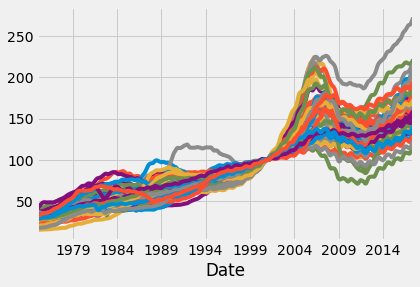

In [49]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)

        #把value改成abbv才可以運作...
        df.rename(columns={'Value':str(abbv)}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()
    
#Panda特有的Pickle方式
HPI_data = pd.read_pickle('HPI_data.pickle') #input

HPI_data.plot()
plt.legend().remove()
plt.show()

Percentage change: df.pct_change()或者是 正常公式

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28  0.006016  0.015259  0.018502  0.009229  0.003240  0.011597   
1975-03-31  0.006962  0.015362  0.017115  0.007977  0.012027  0.011412   
1975-04-30  0.008381  0.015662  0.013090  0.006397  0.019608  0.010619   
1975-05-31  0.007693  0.016596  0.006746  0.005974  0.016021  0.008825   

                  CT        DE        FL        GA    ...           SD  \
Date                                                  ...                
1975-01-31       NaN       NaN       NaN       NaN    ...          NaN   
1975-02-28  0.021997 -0.000288  0.039177 -0.008929    ...    -0.011043   
1975-03-31  0.016278  0.000872  0.055302 -0.003705    ...    -0.011371   
1975-04-30  0.009007  0.003641  0.064248  0.002070    ...    -0.011463   
1975-05-31  0.002708  0.007414  0.006

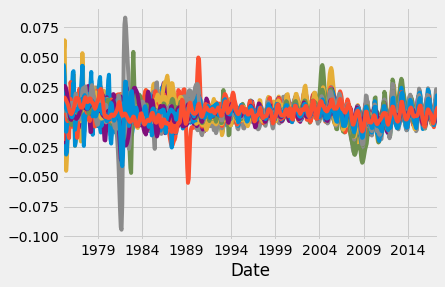

In [51]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #%變化
        df = df.pct_change()
        
        #把value改成abbv才可以運作...
        df.rename(columns={'Value':str(abbv)}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#grab_initial_state_data()

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states.pickle') #input

HPI_data.plot()
plt.legend().remove()
plt.show()

percentage change: 正常公式會從0開始

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  0.601640  1.525922  1.850173  0.922896  0.324025  1.159718   
1975-03-31  1.302056  3.085528  3.593314  1.727945  1.530573  2.314112   
1975-04-30  2.151076  4.700044  4.949362  2.378729  3.521340  3.400535   
1975-05-31  2.936943  6.437680  5.657356  2.990348  5.179892  4.313035   

                  CT        DE         FL        GA    ...           SD  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.199695 -0.028757   3.917665 -0.892923    ...    -1.104275   
1975-03-31  3.863287  0.058406   9.664538 -1.260113    ...    -2.228783   
1975-04-30  4.798768  0.422704  16.710256 -1.055758    ...    -3.349551   
1975-05-31  5.082566  1.167247 

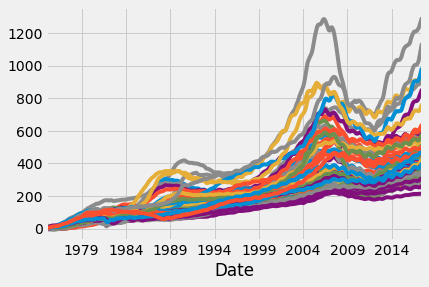

In [55]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#grab_initial_state_data()

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

HPI_data.plot()
plt.legend().remove()
plt.show()

添加新的Benchmark: USA整體

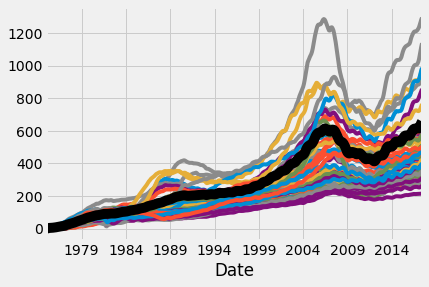

In [62]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#不用再拿取一次

#把Benchmark加進去，詳情看matplotlib tutorial
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input
benchmark = HPI_benchmark()

HPI_data.plot(ax = ax1)
benchmark.plot(ax=ax1, color='k', linewidth=10) #benchmark邊加粗加黑

plt.legend().remove()
plt.show()

Correlation Table

In [64]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#不用再拿取一次

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

#Correlation table
HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation)
print(HPI_State_Correlation.describe())

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.948824  0.939822  0.995250  0.943692  0.959712  0.951918   
AK  0.948824  1.000000  0.915354  0.969565  0.926211  0.959024  0.883156   
AZ  0.939822  0.915354  1.000000  0.939061  0.978110  0.922154  0.914206   
AR  0.995250  0.969565  0.939061  1.000000  0.947417  0.971687  0.942742   
CA  0.943692  0.926211  0.978110  0.947417  1.000000  0.941640  0.936078   
CO  0.959712  0.959024  0.922154  0.971687  0.941640  1.000000  0.875876   
CT  0.951918  0.883156  0.914206  0.942742  0.936078  0.875876  1.000000   
DE  0.983003  0.938496  0.948415  0.977692  0.965332  0.928024  0.979441   
FL  0.932014  0.906711  0.994704  0.931161  0.986812  0.915181  0.921935   
GA  0.978835  0.905903  0.952002  0.969702  0.954412  0.955861  0.943364   
HI  0.945456  0.949879  0.922478  0.952623  0.955008  0.933078  0.908934   
ID  0.982085  0.956151  0.966971  0.980618  0.957765  0.963406  0.912231   
IL  0.983745

# Resampling

df['欄位'].resample('時間單位').方法()

時間單位縮寫參考: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

                 open       high        low      close
Date                                                  
1975-12-31   0.000000   6.207614   0.000000   5.772302
1976-12-31   6.183050  14.263565   6.183050  14.263565
1977-12-31  14.772475  29.252811  14.772475  29.252811
1978-12-31  30.578143  49.484648  30.578143  49.484648
1979-12-31  50.888491  74.457010  50.888491  74.457010


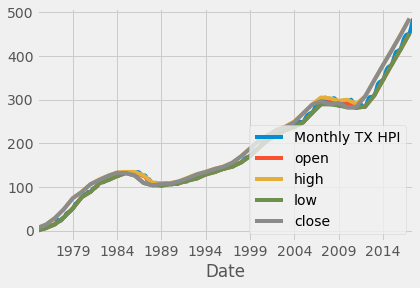

In [10]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#不用再拿取一次

#作圖詳見matplotlib tutorial
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

#.resample('A')表示Annual
#.mean()或.ohlc()等方法表示how
TX1yr = HPI_data['TX'].resample('A').ohlc() #改版後的要這樣寫
print(TX1yr.head())

HPI_data['TX'].plot(ax=ax1, label='Monthly TX HPI')
TX1yr.plot(ax=ax1, label='Yearly TX HPI')

plt.legend(loc=4)
plt.show()

# Handling Missing Data

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

.dropna()

                  TX  TX1yr
Date                       
1975-01-31  0.000000    NaN
1975-02-28  1.018284    NaN
1975-03-31  2.821144    NaN
1975-04-30  5.433889    NaN
1975-05-31  6.207614    NaN
                   TX      TX1yr
Date                            
1975-12-31   5.772302   3.977786
1976-12-31  14.263565  11.427667
1977-12-31  29.252811  22.553793
1978-12-31  49.484648  40.725884
1979-12-31  74.457010  63.347802


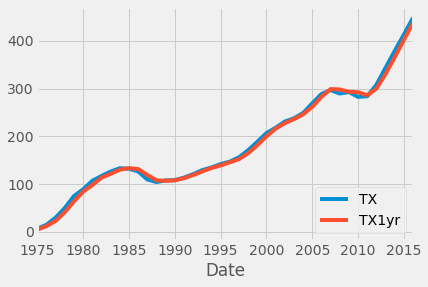

In [16]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#不用再拿取一次

#作圖詳見matplotlib tutorial
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

#.resample('A')表示Annual
#.mean()或.ohlc()等方法表示how
#注意:TX1yr 12個月才會有1次出現，所以會有missing data
HPI_data['TX1yr'] = HPI_data['TX'].resample('A').mean() #改版後的要這樣寫
print(HPI_data[['TX','TX1yr']].head())

#使用.dropna()去除掉所有包含N/A的行數
HPI_data.dropna(how='any', inplace=True)
print(HPI_data[['TX','TX1yr']].head())

HPI_data[['TX','TX1yr']].plot(ax=ax1)


plt.legend(loc=4)
plt.show()

.fillna()

                  TX  TX1yr
Date                       
1975-01-31  0.000000    NaN
1975-02-28  1.018284    NaN
1975-03-31  2.821144    NaN
1975-04-30  5.433889    NaN
1975-05-31  6.207614    NaN
                  TX  TX1yr
Date                       
1975-01-31  0.000000    NaN
1975-02-28  1.018284    NaN
1975-03-31  2.821144    NaN
1975-04-30  5.433889    NaN
1975-05-31  6.207614    NaN
numbers of N/A: 11


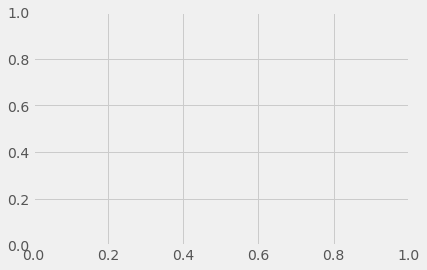

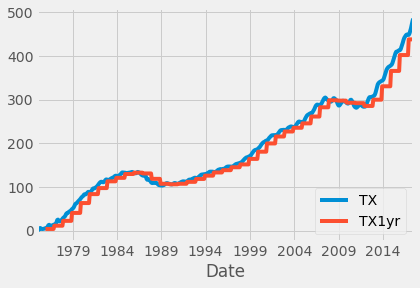

In [20]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#不用再拿取一次

#作圖詳見matplotlib tutorial
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

#.resample('A')表示Annual
#.mean()或.ohlc()等方法表示how
#注意:TX1yr 12個月才會有1次出現，所以會有missing data
HPI_data['TX1yr'] = HPI_data['TX'].resample('A').mean() #改版後的要這樣寫
print(HPI_data[['TX','TX1yr']].head())


#method: ffill是fill forward, bfill是fill backward
#method欄位也可以改成value=100這種寫法，把NA全部轉成數字 
HPI_data.fillna(method='ffill',inplace=True) 
print(HPI_data[['TX','TX1yr']].head())

#計算null的個數: HPI_data.isnull().values.sum()
#可以看到剩下頭11個月份是N/A
print('numbers of N/A: '+str(HPI_data.isnull().values.sum()))

HPI_data[['TX','TX1yr']].plot(ax=ax1)


plt.legend(loc=4)
plt.show()

# Rolling statistics 

Series(指定欄位名稱).rolling(window=次數,center=False).方法()

                  TX  TX12MA  TX12STD
Date                                 
1975-01-31  0.000000     NaN      NaN
1975-02-28  1.018284     NaN      NaN
1975-03-31  2.821144     NaN      NaN
1975-04-30  5.433889     NaN      NaN
1975-05-31  6.207614     NaN      NaN


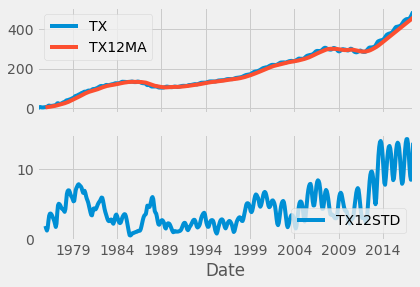

In [27]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#拿過的話不用再拿取一次

#作圖詳見matplotlib tutorial
fig = plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

#Series(指定欄位名稱).rolling(window=12,center=False).mean()，表示12個做一次平均
HPI_data['TX12MA'] = HPI_data['TX'].rolling(window=12,center=False).mean() #改版後的要這樣寫
HPI_data['TX12STD'] = HPI_data['TX'].rolling(window=12,center=False).std() #改版後的要這樣寫
print(HPI_data[['TX','TX12MA','TX12STD']].head())

HPI_data[['TX','TX12MA']].plot(ax=ax1)
HPI_data['TX12STD'].plot(ax=ax2)

plt.legend(loc=4)
plt.show()

Correlation

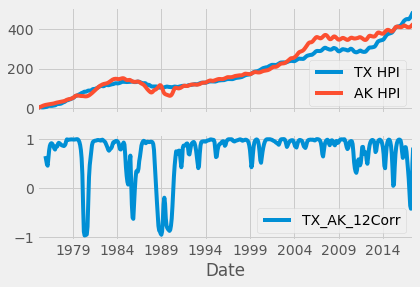

In [31]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {"Value":'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df
    
#grab_initial_state_data()
#拿過的話不用再拿取一次

#作圖詳見matplotlib tutorial
fig = plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

#Panda特有的Pickle方式
HPI_data = pd.read_pickle('fiddy_states3.pickle') #input

#第一個Series.rolling(window=12).corr(other=第二個Series)
TX_AK_12corr = HPI_data['TX'].rolling(window=12).corr(other=HPI_data['AK']) #改版後要這樣寫

HPI_data['TX'].plot(ax=ax1, label='TX HPI')
HPI_data['AK'].plot(ax=ax1, label='AK HPI')
ax1.legend(loc=4)

TX_AK_12corr.plot(ax=ax2, label='TX_AK_12Corr')

plt.legend(loc=4)
plt.show()

# Applying Comparison Operators to DataFrame

    meters          STD
0    10.26          NaN
1    10.31     0.035355
2    10.27     0.028284
3    10.22     0.035355
4    10.23     0.007071
5  6212.42  4385.610607
6    10.28  4385.575252
7    10.25     0.021213
8    10.31     0.042426
2067.38458357
   meters       STD
1   10.31  0.035355
2   10.27  0.028284
3   10.22  0.035355
4   10.23  0.007071
7   10.25  0.021213
8   10.31  0.042426


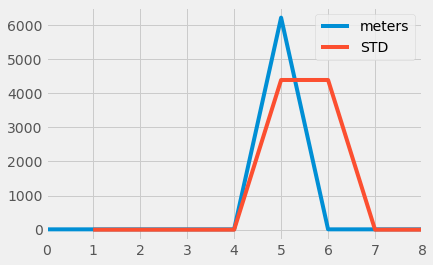

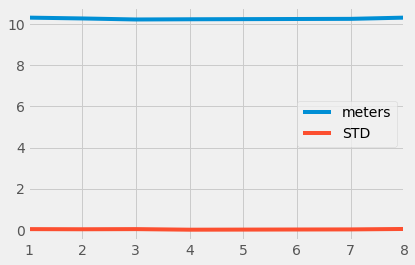

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

#6212.42是故意設定的誤差值，想辦法去除他
bridge_height = {'meters':[10.26, 10.31, 10.27, 10.22, 10.23, 6212.42, 10.28, 10.25, 10.31]}
df1 = pd.DataFrame(bridge_height)

#新增標準差欄位，2天算一次移動標準差
df1['STD'] = df1['meters'].rolling(window=2,center=False).std()
print(df)

df_std = df.describe()['meters']['std']
print(df_std)

#只取出df1當中STD項目小於df_std
df2 = df[ (df1['STD'] < df_std) ]
print(df2)

df1.plot()
df2.plot()
plt.show()

# Joining 30 year mortgage rate  

In [57]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Not necessary, I just do this so I do not show my API key.
api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {'Value':'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df

def mortgage_30y():
    df = quandl.get("FMAC/MORTG", trim_start="1975-01-01", authtoken=api_key)
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    
    #居然可以從月初轉換成月底
    df=df.resample('D').mean()
    df=df.resample('M').mean()
    return df

HPI_data = pd.read_pickle('fiddy_states3.pickle')

m30 = mortgage_30y()
HPI_Bench = HPI_benchmark()

m30.columns=['M30']
HPI = HPI_data.join(m30)

print(HPI.head())
print(HPI.corr()['M30'].describe())
#可以發現如果HPI往上M30往下就可以買進了

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  0.601640  1.525922  1.850173  0.922896  0.324025  1.159718   
1975-03-31  1.302056  3.085528  3.593314  1.727945  1.530573  2.314112   
1975-04-30  2.151076  4.700044  4.949362  2.378729  3.521340  3.400535   
1975-05-31  2.936943  6.437680  5.657356  2.990348  5.179892  4.313035   

                  CT        DE         FL        GA    ...           TN  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.199695 -0.028757   3.917665 -0.892923    ...     0.158526   
1975-03-31  3.863287  0.058406   9.664538 -1.260113    ...     0.436977   
1975-04-30  4.798768  0.422704  16.710256 -1.055758    ...     0.831861   
1975-05-31  5.082566  1.167247 

# Adding other economic indicators

In [73]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Not necessary, I just do this so I do not show my API key.
api_key = open('quandlapikey.txt','r').read()

#找到50州的簡寫
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    #第一章表的第一欄位從1到50
    return fiddy_states[0][0][1:]

#把所有dataframe做整併
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        API_name = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(API_name, authtoken=api_key)
        
        #把value改成abbv才可以運作
        df.rename(columns = {"Value":abbv},inplace=True)
        
        #原始%改變公式
        df[abbv] = (df[abbv]-df[abbv][0])/df[abbv][0] * 100.0
        
        #把value改成abbv才可以運作...
        df.rename(columns = {"Value":abbv}, inplace=True)

        if main_df.empty: #如果df是空白的
            main_df = df
        else:
            main_df = main_df.join(df)

    print(main_df.head())
    
    #正常使用pickle大法儲存df
    pickle_out = open('fiddy_states3.pickle','wb') #寫好儲存的目的地
    pickle.dump(main_df, pickle_out) #執行儲存動作
    pickle_out.close()

#添加新的Benchmark，USA整體
def HPI_benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    #把value改成abbv才可以運作
    df.rename(columns = {'Value':'United States'},inplace=True)
    #原始%改變公式
    df['United States'] = (df['United States']-df['United States'][0])/df['United States'][0] * 100.0
    return df

def mortgage_30y():
    df = quandl.get("FMAC/MORTG", trim_start="1975-01-01", authtoken=api_key)
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    df.rename(columns = {'Value':'mortgage_30y'},inplace=True)
    
    #居然可以從月初轉換成月底
    df=df.resample('D').mean()
    df=df.resample('M').mean()
    return df

#新增三大經濟指標
'''
def sp500_data():
    df = quandl.get("BCIW/_INX", trim_start="1975-01-01", authtoken=api_key)
    df["Adjusted Close"] = (df["Adjusted Close"]-df["Adjusted Close"][0]) / df["Adjusted Close"][0] * 100.0
    df=df.resample('M').mean()
    df.rename(columns={'Adjusted Close':'sp500'}, inplace=True)
    df = df['sp500']
    return df
'''

#由於其他資料都不見了只有GDP可以看
def gdp_data_manufacturing():
    df = quandl.get("BEA/GMP00998_GDP_UNITEDSTATES", trim_start="1975-01-01", authtoken=api_key)
    df["Manufacturing"] = (df["Manufacturing"]-df["Manufacturing"][0]) / df["Manufacturing"][0] * 100.0
    df=df.resample('M').mean()
    df = df["Manufacturing"]
    return df

'''
def us_unemployment():
    df = quandl.get("ECPI/JOB_G", trim_start="1975-01-01", authtoken=api_key)
    df["Unemployment Rate"] = (df["Unemployment Rate"]-df["Unemployment Rate"][0]) / df["Unemployment Rate"][0] * 100.0
    df=df.resample('1D').mean()
    df=df.resample('M').mean()
    return df
'''

#舊的表格們
HPI_data = pd.read_pickle('fiddy_states3.pickle')
m30 = mortgage_30y()
HPI_Bench = HPI_benchmark()

#新的三個表格
#sp500 = sp500_data()
US_GDP_manufacturing = gdp_data_manufacturing()
#US_unemployment = us_unemployment()

#全部join再一起
HPI = HPI_data.join([HPI_Bench, m30, US_GDP_manufacturing])
HPI.dropna(inplace=True) #去除掉沒有的數據欄位

print(HPI.head())
print(HPI.corr().head())

HPI.to_pickle('HPI.pickle')

                    AL          AK          AZ          AR           CA  \
Date                                                                      
2001-12-31  188.283126  208.730171  263.708681  180.026957   598.870165   
2002-12-31  199.372769  227.896527  288.942412  191.884370   720.041825   
2003-12-31  208.990340  254.070633  323.615555  206.215349   858.138080   
2004-12-31  226.580071  289.262940  404.621736  224.796461  1071.624520   
2005-12-31  255.376229  332.659197  580.625068  248.069436  1252.390628   

                    CO          CT          DE          FL          GA  \
Date                                                                     
2001-12-31  439.111923  345.940457  293.551415  255.602564  241.103561   
2002-12-31  457.952423  398.801998  334.387947  301.779821  252.893606   
2003-12-31  467.694826  447.478843  386.465450  355.419433  264.708547   
2004-12-31  491.008028  509.470493  456.642743  453.788808  280.638435   
2005-12-31  515.998570  557.64

# Rolling Apply and Mapping Functions

In [82]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from statistics import mean

# Not necessary, I just do this so I do not show my API key.
api_key = open('quandlapikey.txt','r').read()

def create_labels(cur_hpi, fut_hpi):
    if fut_hpi > cur_hpi:
        return 1
    else:
        return 0

def moving_average(values):
    return mean(values)

housing_data = pd.read_pickle('HPI.pickle')
housing_data = housing_data.pct_change()

housing_data.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_data.dropna(inplace=True)

housing_data['US_HPI_future'] = housing_data['United States'].shift(-1) #往上移動一格移入新欄位

#print(housing_data[['US_HPI_future', 'United States']].head())

#list表示做成列表， map表示套用該函數
housing_data['label'] = list(map(create_labels, housing_data['United States'], housing_data['US_HPI_future']))

#改版後請遵守新寫法
housing_data['ma_apply_example'] = housing_data['mortgage_30y'].rolling(window=5,center=False).apply(moving_average)

print (housing_data.tail())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
2011-12-31 -0.043987 -0.019114 -0.005384  0.011528 -0.055659 -0.008401   
2012-12-31  0.034620  0.047118  0.282799  0.038691  0.130766  0.105621   
2013-12-31  0.050354  0.039295  0.177722  0.021830  0.217315  0.111468   
2014-12-31  0.040191  0.030372  0.059637  0.030189  0.078079  0.110687   
2015-12-31  0.035803  0.057146  0.085542  0.041024  0.089892  0.115571   

                  CT        DE        FL        GA        ...         \
Date                                                      ...          
2011-12-31 -0.052566 -0.075858 -0.018173 -0.088398        ...          
2012-12-31 -0.016872  0.015573  0.135680  0.144585        ...          
2013-12-31  0.019460  0.049154  0.180308  0.201164        ...          
2014-12-31  0.003670  0.029381  0.087610  0.078058        ...          
2015-12-31  0.004890  0.045152  0.135974  0.10270

# Scikit Learn Incorporation

Cheat sheet: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [101]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from statistics import mean
from sklearn import svm, preprocessing, cross_validation

# Not necessary, I just do this so I do not show my API key.
api_key = open('quandlapikey.txt','r').read()

def create_labels(cur_hpi, fut_hpi):
    if fut_hpi > cur_hpi:
        return 1
    else:
        return 0

def moving_average(values):
    return mean(values)

housing_data = pd.read_pickle('HPI.pickle')
housing_data = housing_data.pct_change()

housing_data.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_data.dropna(inplace=True)

housing_data['US_HPI_future'] = housing_data['United States'].shift(-1) #往上移動一格移入新欄位

#print(housing_data[['US_HPI_future', 'United States']].head())

#list表示做成列表， map表示套用該函數
housing_data['label'] = list(map(create_labels, housing_data['United States'], housing_data['US_HPI_future']))

#X是features，y是labels
X = np.array(housing_data.drop(['label','US_HPI_future'], 1))
X = preprocessing.scale(X)
y = np.array(housing_data['label'])

#用60%的資料做模型，用剩下的40%做測試
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.4)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.333333333333
